# Интерференция электромагнитных волн миллиметрового диапазона  
---

# Обработка результатов

In [30]:
import numpy as np
import scipy as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## I. Интерференция в плоскопараллельной пластине

### 1. Убедимся в справедливости закона Малюса
Для этого будем поворачивать приемник вокруг оси z и измерять интенсивность волны.

In [10]:
data = pd.read_excel('lab-461.xlsx', 'table1')
data.head(len(data))

,"I, мкВ",alpha,(cos(alpha))**2
0,26,5,0.992404
1,24,10,0.969846
2,21,15,0.933013
3,18,20,0.883022
4,14,25,0.821394
5,10,30,0.750000


Закон Малюса: $I = I_0 cos^2\alpha$.

In [11]:
x = data.values[:, 2]
y = data.values[:, 0]

x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

k, b = np.polyfit(x, y, deg=1)

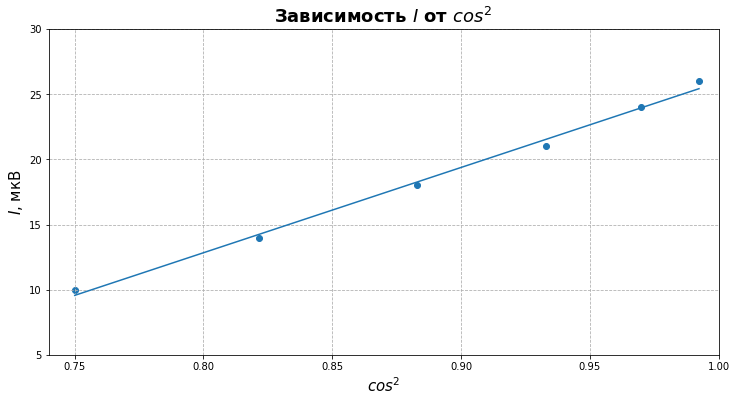

In [20]:
plt.figure(figsize=(12, 6))
plt.grid(linestyle='--')

plt.title('Зависимость $I$ от $cos^2\alpha$', fontweight='bold', fontsize=18)
plt.ylabel('$I$, мкВ', fontsize=15)
plt.xlabel('$cos^2\alpha$', fontsize=15)

plt.scatter(x, y)

plt.plot(x, k * x + b)

plt.xlim((0.74, 1))
plt.ylim((5, 30))

plt.legend()
plt.show()

In [18]:
k

65.356040328983184

Видно, что закон Малюса выполняется, при этом $I_0 = 65.356$ мкВ.

### 2. Определим длину волны $\lambda$
Снимем зависимость интенсивности I от координаты x подвижного зеркала.

In [19]:
data = pd.read_excel('lab-461.xlsx', 'table2')
data.head(len(data))

,"I, мкВ","x, дел"
0,33,0
1,31,50
2,25,100
3,4,150
4,0,200
5,4,250
6,16,300
7,28,350
8,34,400
9,32,450


100 дел = 1 мм

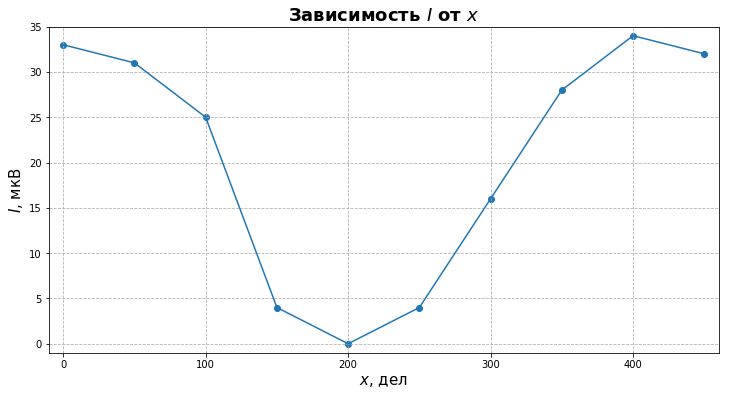

In [28]:
x = data.values[:, 1]
y = data.values[:, 0]

x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

plt.figure(figsize=(12, 6))
plt.grid(linestyle='--')

plt.title('Зависимость $I$ от $x$', fontweight='bold', fontsize=18)
plt.ylabel('$I$, мкВ', fontsize=15)
plt.xlabel('$x$, дел', fontsize=15)

plt.scatter(x, y)
plt.plot(x, y)

plt.xlim((-10, 460))
plt.ylim((-1, 35))

plt.legend()
plt.show()

Из графика находим расстояние $\Delta x$ между двумя соседними максимумами.  
$\Delta x = 400$ дел = 4 мм

#### Рассчитаем $\lambda$ исходя из экспериментальных данных
Разность хода: $\Delta = \dfrac{2d}{cos \theta}$, $cos \theta \rightarrow 1$  
$\Delta = 2d$, $d = \Delta x$  
$\lambda = 2 \Delta x = 8$ мм

#### Рассчитаем теоретическое значение $\lambda$
$\lambda = \dfrac{c}{\nu} = \dfrac{3 \cdot 10^8}{37 \cdot 10^9} = 8.1$ мм

## II. Интерферометр Майкельсона

<img src="lab-461.PNG" width='400'>

Перемещая подвижное зеркало, снимем зависимость координаты x зеркала от номера максимума.

In [33]:
data = pd.read_excel('lab-461.xlsx', 'table3')
data.head(len(data))

,"x, мм",n
0,3.75,1
1,7.69,2
2,11.80,3
3,15.78,4
4,19.70,5
5,23.80,6


In [35]:
x = data.values[:, 1]
y = data.values[:, 0]

x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

k, b = np.polyfit(x, y, deg=1)

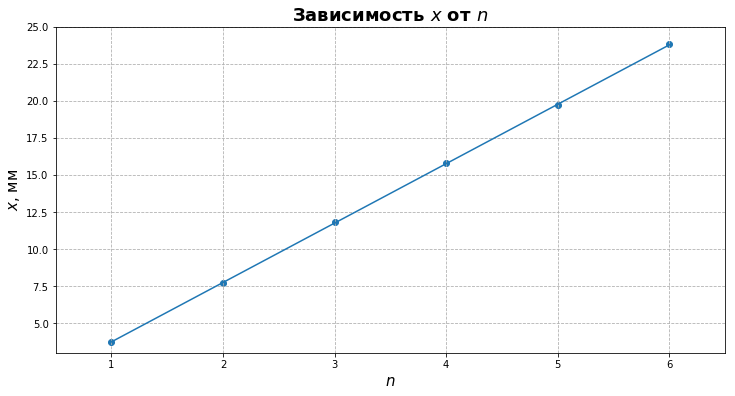

In [40]:
plt.figure(figsize=(12, 6))
plt.grid(linestyle='--')

plt.title('Зависимость $x$ от $n$', fontweight='bold', fontsize=18)
plt.ylabel('$x$, мм', fontsize=15)
plt.xlabel('$n$', fontsize=15)

plt.scatter(x, y)

plt.plot(x, k * x + b)

plt.xlim((0.5, 6.5))
plt.ylim((3, 25))

plt.legend()
plt.show()

In [41]:
k

4.0074285714285702

### 1. По графику определим длину волны $\lambda$
$2 \pi n = \dfrac{2 \pi \Delta}{\lambda}$  
$\lambda = \dfrac{\Delta}{n} = k \cdot 2 = 8$ мм

###  2. Найдем зависимость $I = f(\Delta)$

$I = I_1 + I_2 + 2 \sqrt{I_1 I_2} \cos{\phi}$  
$\phi = k \Delta$, $k = \dfrac{2 \pi}{\lambda}$

Снимем зависимость интенсивности сигнала I от координаты x подвижного зеркала в пределах 1-ой длины волны.

In [47]:
data_th = pd.read_excel('lab-461.xlsx', 'table4')
data_th.head(len(data))

,"I, мкВ","x, мм"
0,45.0,0.0
1,38.0,0.5
2,23.0,1.0
3,9.0,1.5
4,5.0,2.0
5,9.5,2.5
6,24.0,3.0
7,35.0,3.5
8,42.0,4.0


Убирая поочередно зеркала З_1 и З_2, измерим интенсивности каждого из интерферирующих лучей.  
$I_1 = 5$ мкВ, $I_2 = 20$ мкВ  

Найдем теоретическую зависимость $I = f(\Delta)$  
$I = I_1 + I_2 + 2 \sqrt{I_1 I_2} \cos{(2 \pi \dfrac {\Delta}{\lambda})}$  
$I = 25 + 20 \cos{(2 \pi \dfrac {\Delta}{\lambda})}$

In [48]:
data_exp = pd.read_excel('lab-461.xlsx', 'table5')
data_exp.head(len(data))

,"delta, мм","I, мкВ"
0,0,44.9
1,1,39.0
2,2,24.7
3,3,10.6
4,4,5.0
5,5,11.2
6,6,25.7
7,7,39.7
8,8,44.9


Построим на одном графике экспериментальную (table4) и теоретическую (table5) зависимости $I = f(\Delta)$.

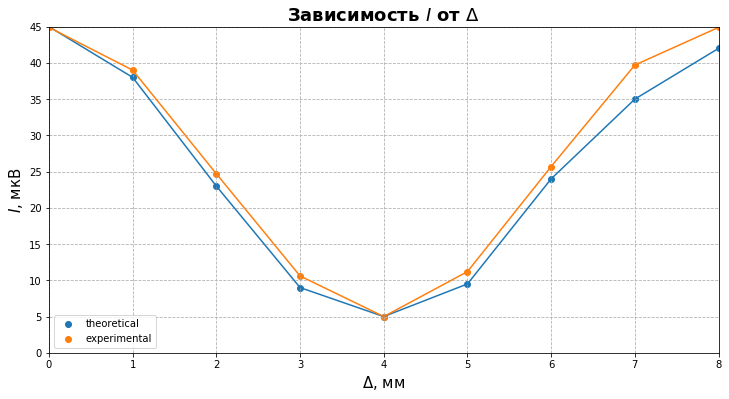

In [55]:
x_th = data_th.values[:, 1]
y_th = data_th.values[:, 0]
x_exp = data_exp.values[:, 0]
y_exp = data_exp.values[:, 1]

x_th = np.array(x_th, dtype=float)
y_th = np.array(y_th, dtype=float)
x_exp = np.array(x_exp, dtype=float)
y_exp = np.array(y_exp, dtype=float)

plt.figure(figsize=(12, 6))
plt.grid(linestyle='--')

plt.title('Зависимость $I$ от $\Delta$', fontweight='bold', fontsize=18)
plt.ylabel('$I$, мкВ', fontsize=15)
plt.xlabel('$\Delta$, мм', fontsize=15)

plt.scatter(x_th * 2, y_th, label = 'theoretical')
plt.scatter(x_exp, y_exp, label = 'experimental')

plt.plot(x_th * 2, y_th)
plt.plot(x_exp, y_exp)

plt.xlim((0, 8))
plt.ylim((0, 45))

plt.legend()
plt.show()

Из графика видно, что теоретическая и экспериментальная зависимости почти совпадают.

 ### 3. Рассчитаем показатель преломления тефлона
 
Если на пути одного из лучей поставить пластинку толщиной $d_0$ с диэлектрической проницаемостью $\varepsilon$, то разность хода изменится на величину $2 d_0 (n-1)$, $n = \sqrt{\varepsilon}$.

Пусть в точке приема до внесения пластины наблюдается интерференционный максимум. Для того, чтобы получить тот же максимум при наличии пластинки, нужно зеркало свободного плеча интерферометра (плеча, в котором нет пластинки) отодвинуть на расстояние $\Delta x_0 = d_0 (n-1)$.  

Определим $\Delta x_0$:  
$\Delta x_0 = 1$ мм  
$n = 1 + \dfrac{\Delta x_0}{d_0}$, $d_0 = 3.2$ мм  
$n = 1 + \dfrac{1}{3.2} = 1.31$

Табличное значение: $n = 1.4$